# Classifying pets( Dog vs Cats )
12 cat breeds, 25 dog breeds

Reference:https://course.fast.ai/videos/?lesson=1


## Fast.AI vs Keras:
Less lines of code 

Training time less than half

Keras does not provide resnet-34 and test time augmentation (TTA)

In [1]:
# Magics : if someone changes the underlying library code, reload the notebook. If plotting, plot on notebook (Not external)
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
# USe untar_data function to automatically download and store data in storage folder
path=untar_data(URLs.PETS);
path

PosixPath('/storage/data/oxford-iiit-pet')

In [4]:
path.ls()

# Get path to images and its class
img_path=path/'images'
annot_path=path/'annotations'

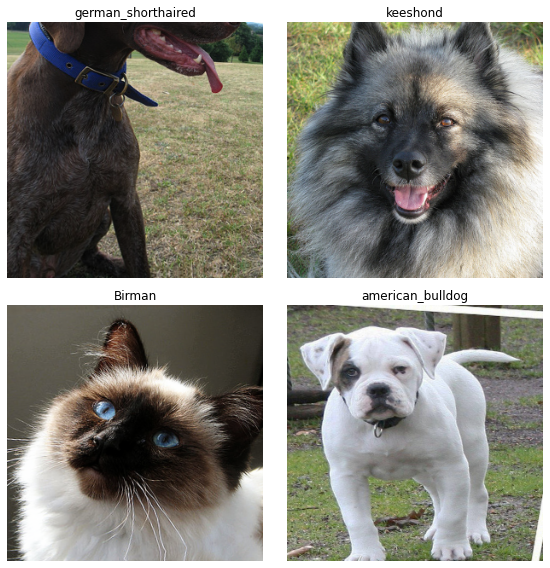

In [5]:
# Getting labels which are in the image file names
image_names=get_image_files(img_path)
image_names[:3]

# Use Regular expression to extract the label
regEx=r'/([^/]+)_\d+.jpg$'

# Use ImageDataBunch object to get data for building the model in required format
# where from_name_re extracts label from the file name using the regEx.
# Reshape the images to 300
data=ImageDataBunch.from_name_re(img_path,image_names,regEx,ds_tfms=get_transforms(),size=300)

#Normalize to get mean 0 and standard deviation as 1. 
data.normalize(imagenet_stats)
data.show_batch(rows=2)

In [6]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

## Training the classifier

In [7]:
#Use the resnet18 architecture for the model along with its pretrained weights
model_learner=cnn_learner(data,models.resnet18,metrics=error_rate)

In [8]:
# Use fit_one_cycle which is better and faster than fit
model_learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.451780,0.402636,0.125169,00:55
1,0.621326,0.288824,0.094046,00:52
2,0.394961,0.271751,0.081867,00:52
3,0.277689,0.263256,0.076455,00:52


In [10]:
#Use the resnet34 architecture for the model along with its pretrained weights
model_learner2=cnn_learner(data,models.resnet34,metrics=error_rate)
model_learner2.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.345341,0.289941,0.093369,01:21
1,0.550391,0.227409,0.068336,01:21
2,0.338606,0.189774,0.059540,01:21
3,0.235096,0.189990,0.063599,01:20


In [12]:
# Use ClassificationInterpretation to see which categories were most confused with other
#i.e hard to predict or differentiate with

interpretations= ClassificationInterpretation.from_learner(model_learner2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


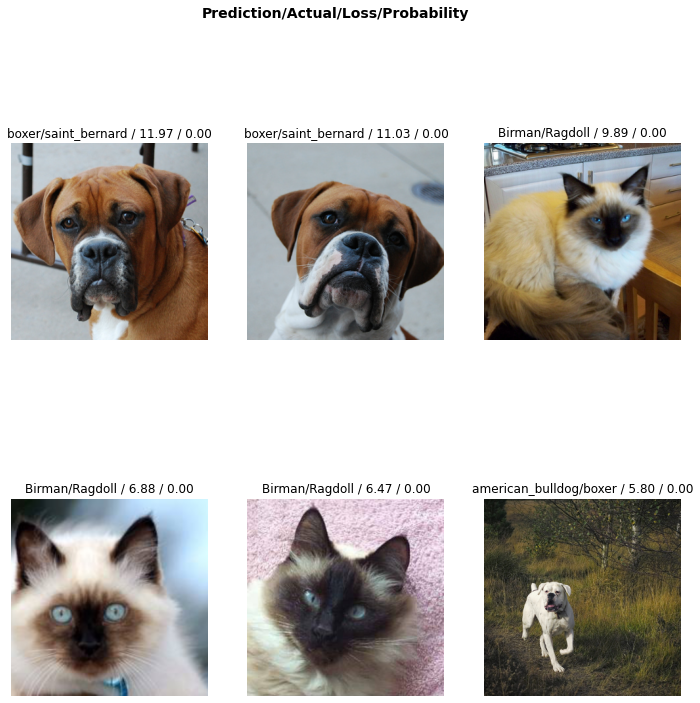

In [13]:
#Plot the images with top losses
interpretations.plot_top_losses(6)

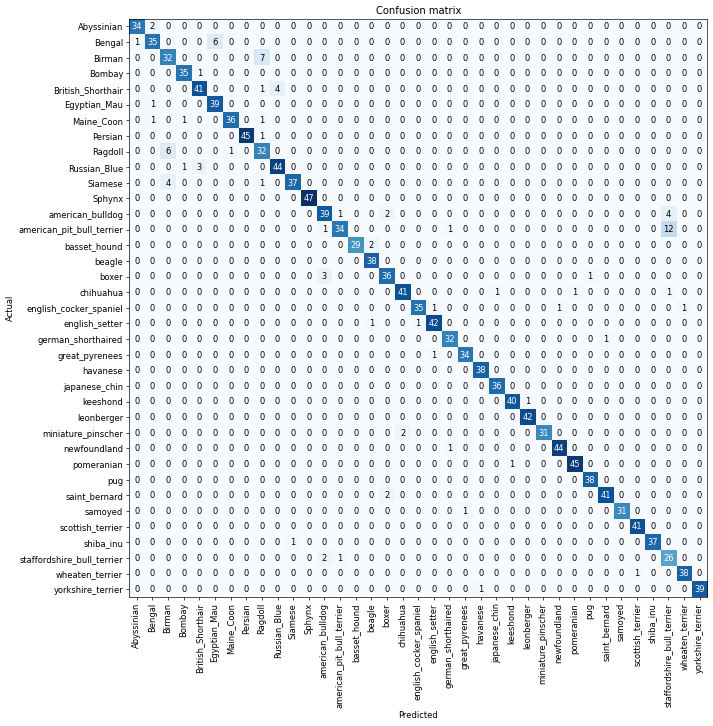

In [17]:
interpretations.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [18]:
# Prints the most confused classes from the confusion matrix 
interpretations.most_confused(min_val=3)


[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 12),
 ('Birman', 'Ragdoll', 7),
 ('Bengal', 'Egyptian_Mau', 6),
 ('Ragdoll', 'Birman', 6),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Siamese', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('boxer', 'american_bulldog', 3)]